In [88]:
# 구글 드라이브의 폴더와 구글 코랩 폴더 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
# 현재 경로 확인
!pwd

/content/drive/My Drive/Colab Notebooks


In [87]:
# drive/My Drive/Colab Notebooks 경로로 변경
%cd drive/My\ Drive/Colab\ Notebooks\

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks'
/content/drive/My Drive/Colab Notebooks


## Localization

> 객체라고 판단되는 곳에 직사각형(bounding box)를 그려주는 작업 <br>
> 학습을 통해 위치를 찾는다

```

학습 데이터는 이미지의 target(label)과 rectangle(x,y좌표, 가로,세로)로 구성되어 있다 
```

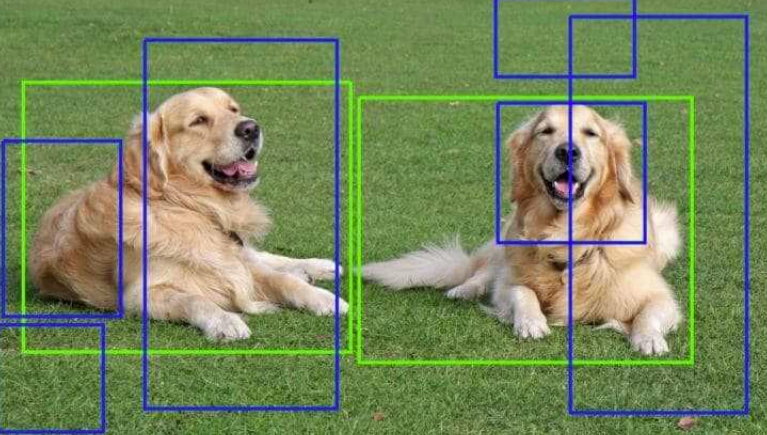

In [90]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpt
import pandas as pd
import tensorflow as tf
import numpy as np
from PIL import Image 

In [60]:
air = pd.read_csv('dataset/annotations/airplane.csv', header=None)
face = pd.read_csv('dataset/annotations/face.csv', header=None)
motorcycle = pd.read_csv('dataset/annotations/motorcycle.csv', header=None)

In [61]:
air.rename(columns={1:'x1',2:'y1',3:'x2',4:'y2',0:'filename',5:'target'}, inplace=True)
face.rename(columns={1:'x1',2:'y1',3:'x2',4:'y2',0:'filename',5:'target'}, inplace=True)
motorcycle.rename(columns={1:'x1',2:'y1',3:'x2',4:'y2',0:'filename',5:'target'}, inplace=True)

In [62]:
air.filename = air.filename.map(lambda x: 'dataset/images/airplane/'+x)
face.filename = face.filename.map(lambda x: 'dataset/images/face/'+x)
motorcycle.filename = motorcycle.filename.map(lambda x: 'dataset/images/motorcycle/'+x)

In [63]:
data=pd.concat([air,face,motorcycle], axis=0, ignore_index=True)

In [19]:
air.head()

,filename,x1,y1,x2,y2,target
0,image_0001.jpg,49,30,349,137,airplane
1,image_0002.jpg,59,35,342,153,airplane
2,image_0003.jpg,47,36,331,135,airplane
3,image_0004.jpg,47,24,342,141,airplane
4,image_0005.jpg,48,18,339,146,airplane


In [56]:
im = plt.imread('dataset/images/airplane/image_0001.jpg')

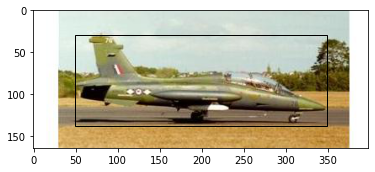

In [57]:
fig, ax = plt.subplots(1,1)
ax.imshow(im)
pt = mpt.Rectangle((49,30),349-49,137-30, fill=False) 
ax.add_patch(pt)

In [64]:
data.target.value_counts() # imbalanced data

airplane      800
motorcycle    798
face          435
Name: target, dtype: int64

In [65]:
im = plt.imread(data.loc[0, 'filename'])

In [69]:
def show_images(i):
  im = plt.imread(data.loc[i, 'filename'])
  fig, ax = plt.subplots(1,1)
  ax.imshow(im)
  pt = mpt.Rectangle((data.loc[i,'x1'],data.loc[i,'y1']),
                     data.loc[i,'x2']-data.loc[i,'x1'],
                     data.loc[i,'y2']-data.loc[i,'y1'], fill=False) 
  ax.add_patch(pt)

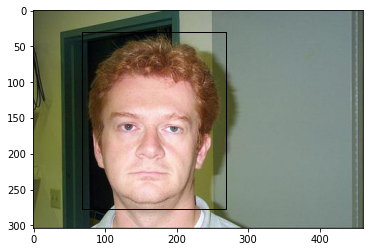

In [70]:
show_images(832)

## One-hot encoding 3가지 방법 

```python
1. scikit learn - onehotencoder 
2. pandas - get_dummies 
3. data['name'] = (data.target=='name')*1
4. tf.keras.utils.to_categorical # label encoding이 되어 있는 것만 바꿀 수 있다 
```

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
ohe = OneHotEncoder()
ohe.fit_transform(data[['target']]).toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [11]:
pd.get_dummies(data.target)

,airplane,face,motorcycle
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
2028,0,0,1
2029,0,0,1
2030,0,0,1
2031,0,0,1


In [40]:
data['airplane'] = (data.target=='airplane')*1
data['face'] = (data.target=='face')*1
data['motorcycle'] = (data.target=='motorcycle')*1

In [36]:
data.tail().filename

2028    dataset/images/motorcycle/image_0794.jpg
2029    dataset/images/motorcycle/image_0795.jpg
2030    dataset/images/motorcycle/image_0796.jpg
2031    dataset/images/motorcycle/image_0797.jpg
2032    dataset/images/motorcycle/image_0798.jpg
Name: filename, dtype: object

In [38]:
# data['label']=data.target.map({'airplane':0, 'face':1, 'motorcycle':2})
tf.keras.utils.to_categorical(data.label)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [42]:
data.drop(columns=['target','label'], inplace=True)

### Label encoding 

```python
1. map
2. scikit-learn - labelencoder 
```

In [17]:
data['label']=data.target.map({'airplane':0, 'face':1, 'motorcycle:':2})

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [15]:
le.fit_transform(data.target)

array([0, 0, 0, ..., 2, 2, 2])

In [44]:
data.values

array([['dataset/images/airplane/image_0001.jpg', 49, 30, ..., 1, 0, 0],
       ['dataset/images/airplane/image_0002.jpg', 59, 35, ..., 1, 0, 0],
       ['dataset/images/airplane/image_0003.jpg', 47, 36, ..., 1, 0, 0],
       ...,
       ['dataset/images/motorcycle/image_0796.jpg', 47, 40, ..., 0, 0, 1],
       ['dataset/images/motorcycle/image_0797.jpg', 48, 54, ..., 0, 0, 1],
       ['dataset/images/motorcycle/image_0798.jpg', 42, 33, ..., 0, 0, 1]],
      dtype=object)

### 이미지 한꺼번에 불러오기 

```python 
1. tf.keras.preprocessing.image_dataset_from_directory => tf.data.Dataset으로 불러온다 
2. tf.keras.preprocessing.image.ImageDataGenerator => numpy로 불러온다 / augmentation과 파일 저장을 옵션으로 사용할 수 있다 
```

In [46]:
data.head()

,filename,x1,y1,x2,y2,airplane,face,motorcycle
0,dataset/images/airplane/image_0001.jpg,49,30,349,137,1,0,0
1,dataset/images/airplane/image_0002.jpg,59,35,342,153,1,0,0
2,dataset/images/airplane/image_0003.jpg,47,36,331,135,1,0,0
3,dataset/images/airplane/image_0004.jpg,47,24,342,141,1,0,0
4,dataset/images/airplane/image_0005.jpg,48,18,339,146,1,0,0


In [103]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255) # normalization하면서 불러온다
dg = idg.flow_from_dataframe(data, class_mode='raw', y_col=['x1','x2','y1','y2'], target_size=(64,128)) # resize를 강제시킨다 / 데이터 값을 내가 원하는 형태로 불러올 수 있다 
# localization에 활용하기 좋은 형태로 불러올 수 있다 

Found 2033 validated image filenames.


In [48]:
ims = next(dg)

In [49]:
ims[1][0], ims[1][1]

(array([ 82, 366,  56, 171]), array([ 34, 230,  19, 127]))

In [50]:
ims[0][0].shape

(256, 256, 3)

In [104]:
train = tf.data.Dataset.from_generator(lambda :dg, output_types=(tf.float32,tf.float32))

In [52]:
t = iter(train.take(1))

In [53]:
next(t)

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
 array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
      

In [54]:
for i in train.take(1):
  print(i[1])

tf.Tensor(
[[ 46. 352.  29. 113.]
 [ 47. 217.  40. 141.]
 [ 34. 228.  18. 121.]
 [266. 462.  54. 324.]
 [207. 391.  20. 282.]
 [ 61. 346.  24. 148.]
 [ 70. 347.  86. 167.]
 [ 33. 228.  17. 127.]
 [ 80. 280.  39. 314.]
 [ 48. 345.  27. 108.]
 [ 35. 229.  20. 126.]
 [ 54. 346.  29. 120.]
 [ 35. 232.  23. 149.]
 [ 61. 350.  27. 113.]
 [ 35. 216.  23. 134.]
 [ 48. 221.  43. 138.]
 [155. 348.  18. 263.]
 [ 52. 349.  28. 116.]
 [160. 375.  28. 304.]
 [ 51. 345.  33. 138.]
 [ 49. 344.  23. 122.]
 [ 55. 345.  22. 140.]
 [ 49. 349.  33. 107.]
 [ 34. 226.  22. 133.]
 [ 62. 353.  67. 127.]
 [ 49. 225.  52. 150.]
 [ 32. 233.  18. 137.]
 [118. 297.  13. 258.]
 [ 43. 344.  31. 117.]
 [ 57. 344.  24. 105.]
 [247. 432.  19. 286.]
 [ 55. 352.  31. 140.]], shape=(32, 4), dtype=float32)


In [105]:
vgg = tf.keras.applications.VGG16(include_top=False)
vgg.trainable = False 

In [106]:
input_ = tf.keras.Input((64,128,3))
x = tf.keras.layers.Lambda(lambda x:tf.keras.applications.vgg16.preprocess_input(x))(input_)
x = vgg(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4)(x)
model = tf.keras.models.Model(input_, x)

In [107]:
model.compile(loss=tf.keras.losses.MeanAbsoluteError(), metrics=['mae']) # Huber는 값이 클 때는 L1 loss, 값이 작을 때는 L2 loss 방식을 쓴다 

In [108]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 64, 128, 3)]      0         
_________________________________________________________________
lambda_3 (Lambda)            (None, 64, 128, 3)        0         
_________________________________________________________________
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 16388     
Total params: 14,731,076
Trainable params: 16,388
Non-trainable params: 14,714,688
_________________________________________________________________


In [109]:
model.fit(train, epochs=1, steps_per_epoch=50)

50/50 [==============================] - 933s 19s/step - loss: 108.1627 - mae: 108.1627


In [99]:
model(x[tf.newaxis])

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-17.944298 ,  15.799198 ,  19.511517 ,   1.9699388]],
      dtype=float32)>

In [97]:
im = Image.open('dataset/images/airplane/image_0001.jpg')
x = np.array(im.resize((128,64)))

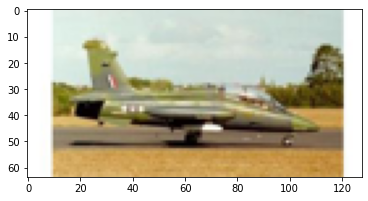

In [98]:
plt.imshow(x)

## Fast R-CNN

> Localization + Classification을 한방에 처리하는 모델 

```python
Localization 문제를 CNN으로 풀수 있지만 Machine learning은 ad-hoc 이라는 특성 때문에 
catastrophic forgetting문제와 multi-loss문제로 인해 Localization + classification을 동시에 할 수 없었다 
왜냐 하면 여태까지 localization을 Regression으로 해결해왔기 때문에 multiple loss를 사용하면 어느 하나 모델은 굉장히 성능이 떨어지는 문제가 있었다  
그리고 classification + localization 문제를 CNN하나로 해결 할 수 있을 거라 생각하지 못 했었다 

그런데 CNN은 위치정보와 특성정보를 동시에 갖고 있기 때문에 output을 두 개로 늘려 multiple loss를 동시에 사용해도 학습이 잘 되는 것을 확인할 수 있었다  
```

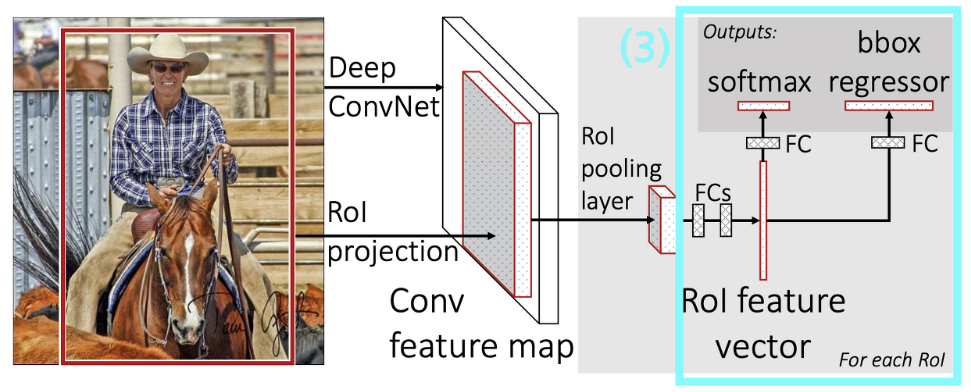